# **Business Problem**
**Customers struggle to find relevant fashion products due to the vast variety available online. This leads to poor user experience and lower sales, which can be improved using a personalized recommendation system.**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load the data**

In [3]:
df=pd.read_csv('fashion_products.csv')
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


# **Data Understanding**

In [5]:
df.shape

(1000, 9)

In [9]:
df.columns

Index(['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price',
       'Rating', 'Color', 'Size'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [13]:
df.dtypes

User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object

In [15]:
df['Product Name'].unique()

array(['Dress', 'Shoes', 'T-shirt', 'Jeans', 'Sweater'], dtype=object)

In [17]:
df['Product Name'].value_counts()

Product Name
Jeans      231
Shoes      222
T-shirt    201
Dress      176
Sweater    170
Name: count, dtype: int64

In [19]:
df['Brand'].value_counts()

Brand
Nike      214
Zara      203
Adidas    198
H&M       194
Gucci     191
Name: count, dtype: int64

In [21]:
df['Category'].value_counts()

Category
Kids' Fashion      351
Women's Fashion    327
Men's Fashion      322
Name: count, dtype: int64

In [23]:
df['Color'].value_counts()

Color
White     193
Yellow    175
Blue      172
Green     156
Black     154
Red       150
Name: count, dtype: int64

In [25]:
df['Size'].value_counts()

Size
XL    254
L     251
S     249
M     246
Name: count, dtype: int64

In [27]:
continous=['Price','Rating']
categorical=['Product Name', 'Brand', 'Category','Color','Size']

# **Data Exploration**

In [30]:
df[continous].describe()

,Price,Rating
count,1000.000000,1000.000000
mean,55.785000,2.993135
std,26.291748,1.153185
min,10.000000,1.000967
25%,33.000000,1.992786
50%,57.000000,2.984003
75%,78.250000,3.985084
max,100.000000,4.987964


In [32]:
df[categorical].describe()

,Product Name,Brand,Category,Color,Size
count,1000,1000,1000,1000,1000
unique,5,5,3,6,4
top,Jeans,Nike,Kids' Fashion,White,XL
freq,231,214,351,193,254


In [34]:
df[continous].skew()

Price    -0.060888
Rating   -0.018663
dtype: float64

In [36]:
df[continous].corr()

,Price,Rating
Price,1.000000,0.033927
Rating,0.033927,1.000000


In [38]:
df.isnull().sum()

User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

In [40]:
df.duplicated().sum()

0

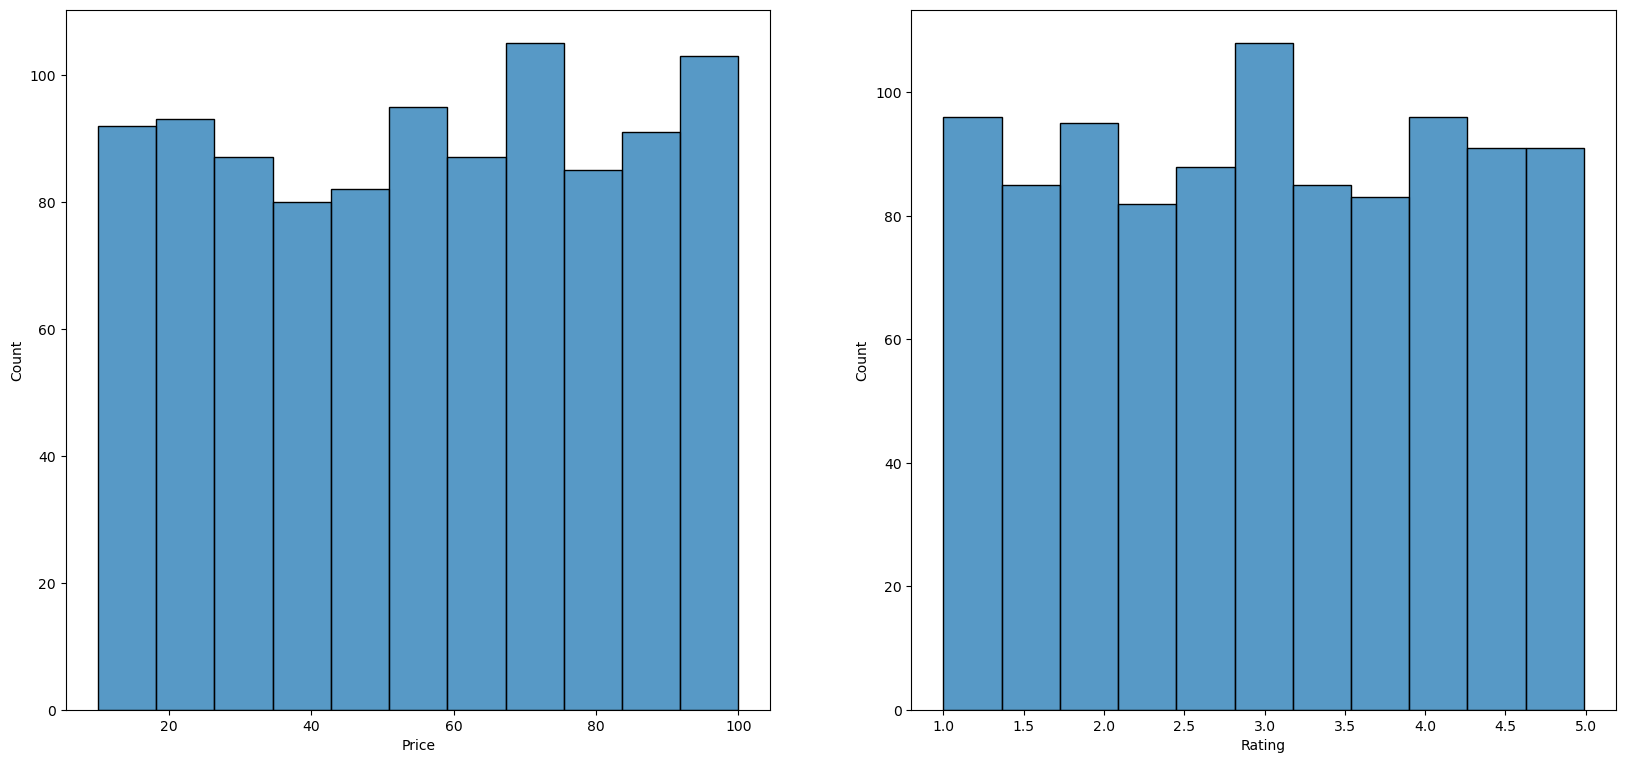

In [42]:
j=1
plt.figure(figsize=(20,20))
for i in continous:
    plt.subplot(2,2,j)
    sns.histplot(df[i])
    j+=1
plt.show()

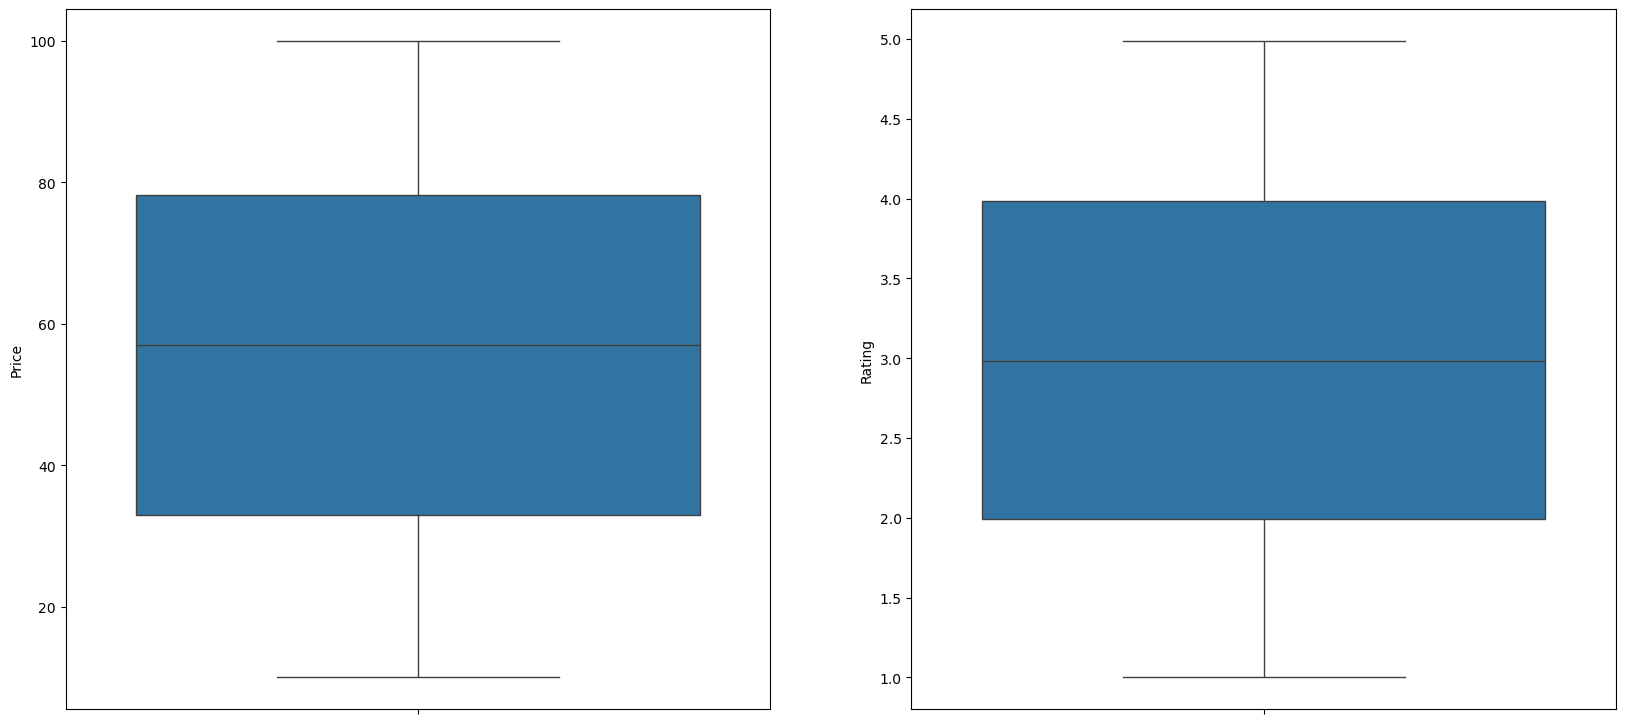

In [44]:
j=1
plt.figure(figsize=(20,20))
for i in continous:
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    j+=1
plt.show()

# **Data Preprocessing**

**1. Cleaning** 

- **Feature engineering**

In [49]:
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [51]:
df['Product']=df['Color']+' '+df['Brand']+' '+df['Product Name']

In [53]:
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size,Product
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL,Black Adidas Dress
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L,Black H&M Shoes
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL,Yellow Adidas Dress
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S,White Zara Shoes
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M,Black Adidas T-shirt
...,...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M,Black Zara Shoes
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L,Green Nike Sweater
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L,White Zara Sweater
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S,Blue Zara T-shirt


- **Treating Wrong data**

In [56]:
# no wrong data is there

- **Missing Values**

In [59]:
# no missing values

- **Wrong data type**

In [62]:
# No worng data type

- **Duplicates**

In [65]:
# No duplicates are there

- **Outiers**

In [68]:
# No outliers

- **Dimention Reduction**

In [71]:
df.drop(columns=['User ID','Product ID','Product Name','Brand','Color'],inplace=True)

In [73]:
df

,Category,Price,Rating,Size,Product
0,Men's Fashion,40,1.043159,XL,Black Adidas Dress
1,Women's Fashion,82,4.026416,L,Black H&M Shoes
2,Women's Fashion,44,3.337938,XL,Yellow Adidas Dress
3,Men's Fashion,23,1.049523,S,White Zara Shoes
4,Men's Fashion,79,4.302773,M,Black Adidas T-shirt
...,...,...,...,...,...
995,Women's Fashion,55,1.620081,M,Black Zara Shoes
996,Kids' Fashion,13,1.544464,L,Green Nike Sweater
997,Men's Fashion,47,3.961913,L,White Zara Sweater
998,Women's Fashion,68,3.089722,S,Blue Zara T-shirt


In [75]:
df.to_csv('cleaned_fashion_product.csv',index=False)

# **Recommendation Engine**

In [78]:
df=pd.read_csv('cleaned_fashion_product.csv')
df

,Category,Price,Rating,Size,Product
0,Men's Fashion,40,1.043159,XL,Black Adidas Dress
1,Women's Fashion,82,4.026416,L,Black H&M Shoes
2,Women's Fashion,44,3.337938,XL,Yellow Adidas Dress
3,Men's Fashion,23,1.049523,S,White Zara Shoes
4,Men's Fashion,79,4.302773,M,Black Adidas T-shirt
...,...,...,...,...,...
995,Women's Fashion,55,1.620081,M,Black Zara Shoes
996,Kids' Fashion,13,1.544464,L,Green Nike Sweater
997,Men's Fashion,47,3.961913,L,White Zara Sweater
998,Women's Fashion,68,3.089722,S,Blue Zara T-shirt


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rapidfuzz import process

combined_feature=df['Category']+' '+df['Product']

vectorizer=TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_feature)

similarity= cosine_similarity(feature_vectors)

input_product= input('Enter Product:')

database_products=df['Product'].tolist()

find_match=process.extract(input_product, database_products)

closest_match=find_match[0]

index_of_product=closest_match[2]

similarity_score=list(enumerate(similarity[index_of_product]))

sorted_product_list=sorted(similarity_score, key=lambda x:x[1], reverse=True)

print('Some similar records:\n')



i=1
recommendation={'category':[],'product':[]}
for recommended_product in sorted_product_list:
    index= recommended_product[0]
    category=df[df.index == index]['Category'].values[0]
    product=df[df.index == index]['Product'].values[0]
    
    if (i<=10):
        recommendation['category'].append(category)
        recommendation['product'].append(product)
    i+=1
pd.DataFrame({'Category' : recommendation['category'], 'Product' : recommendation['product']})

Enter Product: zara top


Some similar records:



,Category,Product
0,Kids' Fashion,Green Zara T-shirt
1,Kids' Fashion,Green Zara T-shirt
2,Kids' Fashion,Green Zara T-shirt
3,Kids' Fashion,Green Zara T-shirt
4,Kids' Fashion,Green H&M T-shirt
5,Men's Fashion,Green Zara T-shirt
6,Kids' Fashion,Green Zara Jeans
7,Kids' Fashion,Green Zara Shoes
8,Kids' Fashion,Green Zara Shoes
9,Kids' Fashion,Green Nike T-shirt
